In [47]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("/Users/qianj/Documents/Kaggle_Competition/PlayGround/Classification_with_an_Academic_Success_Dataset/train.csv")

data.columns


Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [42]:
y = data['Target']
X = data.drop(['id','Target'],axis=1)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

In [44]:
c_set = np.arange(1,15,1)
for c in c_set:
    DTC = DecisionTreeClassifier(max_depth=c)
    DTC.fit(X_train,y_train)
    print(c,DTC.score(X_test,y_test))

1 0.7407736539466806
2 0.7895974908520648
3 0.8033978044955568
4 0.8061683220073184
5 0.8131207527443806
6 0.8177208572922112
7 0.8177208572922112
8 0.8182435964453738
9 0.8192890747516989
10 0.8175640355462624
11 0.8128593831677993
12 0.8109775222164141
13 0.8055933089388395
14 0.8006795608991113


In [45]:
DTC = DecisionTreeClassifier(max_depth=9)
DTC.fit(X,y)

DecisionTreeClassifier(max_depth=9)

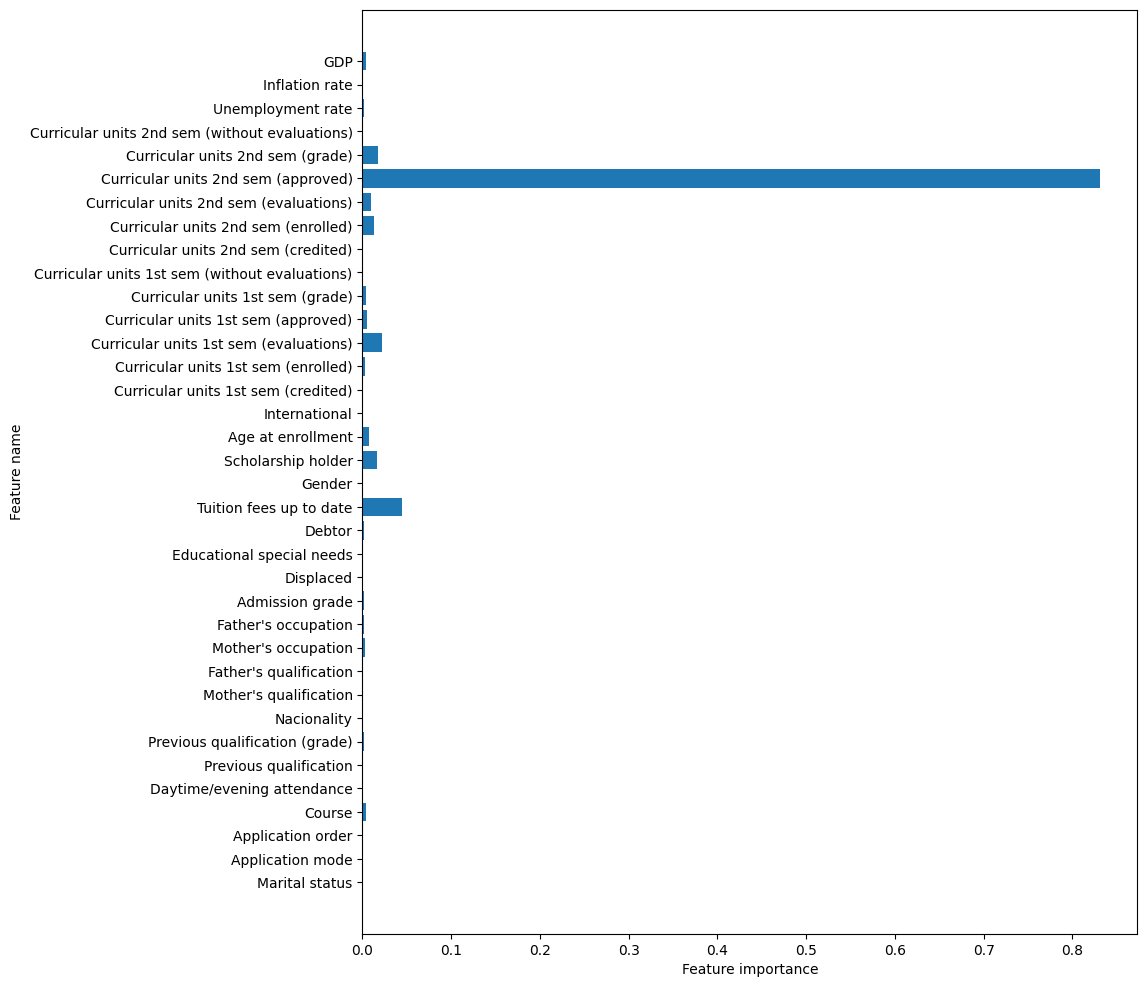

In [61]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

plt.figure(figsize=(10,12))
plot_feature_importances(DTC,X.columns)
plt.show()

In [57]:
for x,y in sorted(zip(DTC.feature_importances_,X.columns)):
    print(x,y)

0.0 Curricular units 2nd sem (credited)
0.0 Daytime/evening attendance
4.920741429295643e-05 Marital status
5.766493862455833e-05 Curricular units 1st sem (without evaluations)
5.7898466713189234e-05 Educational special needs
6.330575452090678e-05 Curricular units 1st sem (credited)
6.663504018837849e-05 Displaced
0.0001178331340727803 International
0.00022834081331609546 Previous qualification
0.000251555852892078 Nacionality
0.00031237210740455855 Curricular units 2nd sem (without evaluations)
0.0004991778962540067 Gender
0.0006091653561341929 Inflation rate
0.0006281658589150739 Application mode
0.0007918677602871767 Father's qualification
0.0009973361223539522 Application order
0.0011223809897405233 Mother's qualification
0.001312628438305321 Debtor
0.001428338142518686 Previous qualification (grade)
0.0016458384400802138 Father's occupation
0.0018759509470924634 Unemployment rate
0.002114534112279934 Admission grade
0.003161569277621244 Curricular units 1st sem (enrolled)
0.003164

In [20]:
TEST = pd.read_csv("/Users/qianj/Documents/Kaggle_Competition/PlayGround/Classification_with_an_Academic_Success_Dataset/test.csv")
test = TEST.drop(['id'],axis=1)
#test = scaler.transform(test)
yhat = DTC.predict(test)

In [21]:
def file(yhat):
    yhat = pd.DataFrame({'Target':yhat})
    result = TEST.join(yhat)
    result[['id','Target']].to_csv("/Users/qianj/Documents/Kaggle_Competition/PlayGround/Classification_with_an_Academic_Success_Dataset/result.csv",index=False)
    return
file(yhat)